In [52]:
# ALL LIBRARY
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

print("You are ready to go")


You are ready to go


In [53]:
df = pd.read_csv("bankloan.csv")
df = df.dropna()
df.isna().any()
df = df.drop("Loan_ID",axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [54]:
y = df['Loan_Status']
x = df.drop("Loan_Status",axis=1)
X = pd.get_dummies(x)
Y = y.map(dict(Y=1,N=0))
X.head()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1


In [55]:
Y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [56]:
smote = SMOTE(sampling_strategy=0.5,random_state=10)
X1, y = smote.fit_resample(X,Y)
sc = MinMaxScaler()
X=sc.fit_transform(X1)

In [57]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22,shuffle=True)

In [58]:
#Now we'll use neral network for aour classification Model

In [72]:
classifier = Sequential()
classifier.add(Dense(800, activation='relu',kernel_initializer='random_normal',input_dim=x_test.shape[1]))
classifier.add(Dense(750, activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(200, activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(50, activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(10, activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])
classifier.fit(X_train,y_train,epochs=100,batch_size=20,verbose=0)
eval_model=classifier.evaluate(X_train,y_train)
eval_model

13/13 [==============================] - 0s 6ms/step - loss: 0.1984 - accuracy: 0.9171


[0.1983557641506195, 0.9170854091644287]

In [83]:
# Now we got approximately 91% of accuracy in model 

In [73]:
y_pred = classifier.predict(x_test)
y_pred=(y_pred>0.55)

4/4 [==============================] - 0s 3ms/step


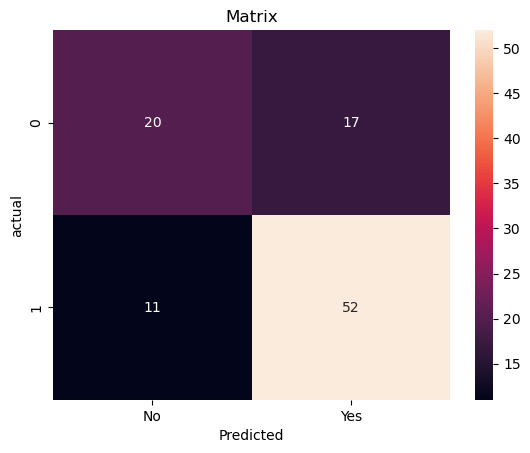

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted');
ax.set_ylabel("actual");
ax.set_title("Matrix");
ax.xaxis.set_ticklabels(['No','Yes']);


In [84]:
# Even after getting 91% of accuracy we get these results

In [75]:
import pickle
import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier,filename)

['loan_model.pkl']

In [76]:
#In above cell we had pickle our model that we can use again in another jupyter ntebook even after some time and we do not have to run this again and again

In [77]:
import pickle
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [78]:
scaler = MinMaxScaler()

In [79]:
model = joblib.load('loan_model.pkl')
x = x_test
x = scaler.fit_transform(x)
y_pred = model.predict(x)
y_pred = (y_pred>0.58)

4/4 [==============================] - 0s 3ms/step


In [80]:
y_pred

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [81]:
value = pd.DataFrame(y_pred,columns=['Status'])
value = value.replace({True:'Approved',False:'Rejected'})

In [82]:
value

,Status
0,Rejected
1,Approved
2,Approved
3,Approved
4,Approved
...,...
95,Approved
96,Approved
97,Approved
98,Approved
